In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%reload_ext autoreload
%autoreload 2

In [2]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target.astype(int)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh  = encoder.transform(y_test.reshape(-1, 1))


In [3]:
depth = [1,2,3,4]
width = [2, 4, 8, 16, 32, 64, 128]
lr = [0.001, 0.01, 0.1]
information = {
    'depth' : [],
    'width' : [],
    'lr' : [],

    'acc' : []
}


Model = 1
for d in depth:
    for w in width:
        for r in lr:
            Reg_nn = NeuralNetwork(X_train.shape[1], [w]*d + [10], [sigmoid]*d + [softmax], [derivate(sigmoid)]*d + [derivate(softmax)], cross_entropy, cross_entropy_der)
            Reg_nn.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=r, optimizer="Adam")
            y_pred_train = Reg_nn._feed_forward(X_train)
            y_pred_test = Reg_nn._feed_forward(X_test)
            y_pred_label_train = np.argmax(y_pred_train, axis=1)
            y_pred_label = np.argmax(y_pred_test, axis=1)
            train_accuracy = np.mean(y_train == y_pred_label_train)
            test_accuracy = np.mean(y_test == y_pred_label)

            information['depth'].append(d)
            information['width'].append(w)
            information['lr'].append(r)
            information['acc'].append((train_accuracy,test_accuracy))
              

            print(f"Model {Model} done. Train accuracy: {train_accuracy:.4f}. Test accuracy: {test_accuracy:.4f}")
            Model += 1


Model 1 done. Train accuracy: 0.3908. Test accuracy: 0.3927
Model 2 done. Train accuracy: 0.4491. Test accuracy: 0.4423
Model 3 done. Train accuracy: 0.3580. Test accuracy: 0.3508
Model 4 done. Train accuracy: 0.6334. Test accuracy: 0.6319
Model 5 done. Train accuracy: 0.8146. Test accuracy: 0.8013
Model 6 done. Train accuracy: 0.7883. Test accuracy: 0.7737
Model 7 done. Train accuracy: 0.8189. Test accuracy: 0.8206
Model 8 done. Train accuracy: 0.9160. Test accuracy: 0.8971
Model 9 done. Train accuracy: 0.8787. Test accuracy: 0.8659
Model 10 done. Train accuracy: 0.8932. Test accuracy: 0.8873
Model 11 done. Train accuracy: 0.9562. Test accuracy: 0.9318
Model 12 done. Train accuracy: 0.9408. Test accuracy: 0.9204
Model 13 done. Train accuracy: 0.9286. Test accuracy: 0.9210
Model 14 done. Train accuracy: 0.9827. Test accuracy: 0.9495


/uio/hume/student-u15/sverremj/Master/Project_2_FYSSTK/Project_2_FYSSTK/Code/functions/activation_funcs.py:10: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-X))


Model 15 done. Train accuracy: 0.9663. Test accuracy: 0.9456
Model 16 done. Train accuracy: 0.9460. Test accuracy: 0.9273
Model 17 done. Train accuracy: 0.9969. Test accuracy: 0.9588
Model 18 done. Train accuracy: 0.9681. Test accuracy: 0.9504
Model 19 done. Train accuracy: 0.9655. Test accuracy: 0.9343
Model 20 done. Train accuracy: 0.9999. Test accuracy: 0.9649
Model 21 done. Train accuracy: 0.9757. Test accuracy: 0.9595
Model 22 done. Train accuracy: 0.3559. Test accuracy: 0.3616
Model 23 done. Train accuracy: 0.4042. Test accuracy: 0.4003
Model 24 done. Train accuracy: 0.3877. Test accuracy: 0.3876
Model 25 done. Train accuracy: 0.4695. Test accuracy: 0.4739
Model 26 done. Train accuracy: 0.8074. Test accuracy: 0.7929
Model 27 done. Train accuracy: 0.6769. Test accuracy: 0.6643
Model 28 done. Train accuracy: 0.8218. Test accuracy: 0.8159
Model 29 done. Train accuracy: 0.9105. Test accuracy: 0.8901
Model 30 done. Train accuracy: 0.9012. Test accuracy: 0.8841
Model 31 done. Train acc

In [4]:
information_Relu = {
    'depth' : [],
    'width' : [],
    'lr' : [],

    'acc' : []
}


Model = 1
for d in depth:
    for w in width:
        for r in lr:
            Reg_nn = NeuralNetwork(X_train.shape[1], [w]*d + [10], [RELU]*d + [softmax], [derivate(RELU)]*d + [derivate(softmax)], cross_entropy, cross_entropy_der)
            Reg_nn.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=r, optimizer="Adam")
            y_pred_train = Reg_nn._feed_forward(X_train)
            y_pred_test = Reg_nn._feed_forward(X_test)
            y_pred_label_train = np.argmax(y_pred_train, axis=1)
            y_pred_label = np.argmax(y_pred_test, axis=1)
            train_accuracy = np.mean(y_train == y_pred_label_train)
            test_accuracy = np.mean(y_test == y_pred_label)

            information_Relu['depth'].append(d)
            information_Relu['width'].append(w)
            information_Relu['lr'].append(r)
            information_Relu['acc'].append((train_accuracy,test_accuracy))
              

            print(f"Model {Model} done. Train accuracy: {train_accuracy:.4f}. Test accuracy: {test_accuracy:.4f}")
            Model += 1

Model 1 done. Train accuracy: 0.3529. Test accuracy: 0.3449
Model 2 done. Train accuracy: 0.6809. Test accuracy: 0.6709
Model 3 done. Train accuracy: 0.4292. Test accuracy: 0.4307
Model 4 done. Train accuracy: 0.5699. Test accuracy: 0.5675
Model 5 done. Train accuracy: 0.6759. Test accuracy: 0.6787
Model 6 done. Train accuracy: 0.6584. Test accuracy: 0.6490
Model 7 done. Train accuracy: 0.6192. Test accuracy: 0.6213
Model 8 done. Train accuracy: 0.9131. Test accuracy: 0.9026
Model 9 done. Train accuracy: 0.6880. Test accuracy: 0.6795
Model 10 done. Train accuracy: 0.8533. Test accuracy: 0.8532
Model 11 done. Train accuracy: 0.9580. Test accuracy: 0.9406
Model 12 done. Train accuracy: 0.9112. Test accuracy: 0.8951
Model 13 done. Train accuracy: 0.9151. Test accuracy: 0.9033
Model 14 done. Train accuracy: 0.9823. Test accuracy: 0.9537
Model 15 done. Train accuracy: 0.9517. Test accuracy: 0.9310
Model 16 done. Train accuracy: 0.9331. Test accuracy: 0.9147
Model 17 done. Train accuracy: 0.

/uio/hume/student-u15/sverremj/Master/Project_2_FYSSTK/Project_2_FYSSTK/Code/functions/cost_functions.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.sum(target*np.log(predict))
/uio/hume/student-u15/sverremj/Master/Project_2_FYSSTK/Project_2_FYSSTK/Code/functions/cost_functions.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(target*np.log(predict))


Model 21 done. Train accuracy: 0.9609. Test accuracy: 0.9429
Model 22 done. Train accuracy: 0.3563. Test accuracy: 0.3569
Model 23 done. Train accuracy: 0.4337. Test accuracy: 0.4311
Model 24 done. Train accuracy: 0.0979. Test accuracy: 0.0997
Model 25 done. Train accuracy: 0.5627. Test accuracy: 0.5616
Model 26 done. Train accuracy: 0.7706. Test accuracy: 0.7639
Model 27 done. Train accuracy: 0.0979. Test accuracy: 0.0997
Model 28 done. Train accuracy: 0.5404. Test accuracy: 0.5401
Model 29 done. Train accuracy: 0.7047. Test accuracy: 0.6976
Model 30 done. Train accuracy: 0.6165. Test accuracy: 0.6115
Model 31 done. Train accuracy: 0.6681. Test accuracy: 0.6661
Model 32 done. Train accuracy: 0.9308. Test accuracy: 0.9172
Model 33 done. Train accuracy: 0.7327. Test accuracy: 0.7255
Model 34 done. Train accuracy: 0.8718. Test accuracy: 0.8564
Model 35 done. Train accuracy: 0.9577. Test accuracy: 0.9343
Model 36 done. Train accuracy: 0.7191. Test accuracy: 0.7089
Model 37 done. Train acc

In [5]:
information_lRelu = {
    'depth' : [],
    'width' : [],
    'lr' : [],

    'acc' : []
}


Model = 1
for d in depth:
    for w in width:
        for r in lr:
            Reg_nn = NeuralNetwork(X_train.shape[1], [w]*d + [10], [LRELU]*d + [softmax], [derivate(LRELU)]*d + [derivate(softmax)], cross_entropy, cross_entropy_der)
            Reg_nn.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=r, optimizer="Adam")
            y_pred_train = Reg_nn._feed_forward(X_train)
            y_pred_test = Reg_nn._feed_forward(X_test)
            y_pred_label_train = np.argmax(y_pred_train, axis=1)
            y_pred_label = np.argmax(y_pred_test, axis=1)
            train_accuracy = np.mean(y_train == y_pred_label_train)
            test_accuracy = np.mean(y_test == y_pred_label)

            information_lRelu['depth'].append(d)
            information_lRelu['width'].append(w)
            information_lRelu['lr'].append(r)
            information_lRelu['acc'].append((train_accuracy,test_accuracy))
              

            print(f"Model {Model} done. Train accuracy: {train_accuracy:.4f}. Test accuracy: {test_accuracy:.4f}")
            Model += 1

Model 1 done. Train accuracy: 0.3596. Test accuracy: 0.3516
Model 2 done. Train accuracy: 0.6487. Test accuracy: 0.6426
Model 3 done. Train accuracy: 0.6352. Test accuracy: 0.6256
Model 4 done. Train accuracy: 0.5170. Test accuracy: 0.5104
Model 5 done. Train accuracy: 0.8089. Test accuracy: 0.8052
Model 6 done. Train accuracy: 0.8361. Test accuracy: 0.8226
Model 7 done. Train accuracy: 0.6492. Test accuracy: 0.6515
Model 8 done. Train accuracy: 0.8984. Test accuracy: 0.8910
Model 9 done. Train accuracy: 0.9182. Test accuracy: 0.9068
Model 10 done. Train accuracy: 0.8543. Test accuracy: 0.8536
Model 11 done. Train accuracy: 0.9580. Test accuracy: 0.9414
Model 12 done. Train accuracy: 0.9472. Test accuracy: 0.9306
Model 13 done. Train accuracy: 0.9147. Test accuracy: 0.9030
Model 14 done. Train accuracy: 0.9815. Test accuracy: 0.9534
Model 15 done. Train accuracy: 0.9592. Test accuracy: 0.9419
Model 16 done. Train accuracy: 0.9332. Test accuracy: 0.9142
Model 17 done. Train accuracy: 0.

In [12]:
import matplotlib.style as mplstyle
mplstyle.use(["ggplot", "fast"])

plt.rcParams.update({
    'font.size': 16,          
    'axes.titlesize': 18,     
    'axes.labelsize': 16,   
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,
    'legend.fontsize': 14,    
    'figure.titlesize': 20,   
})

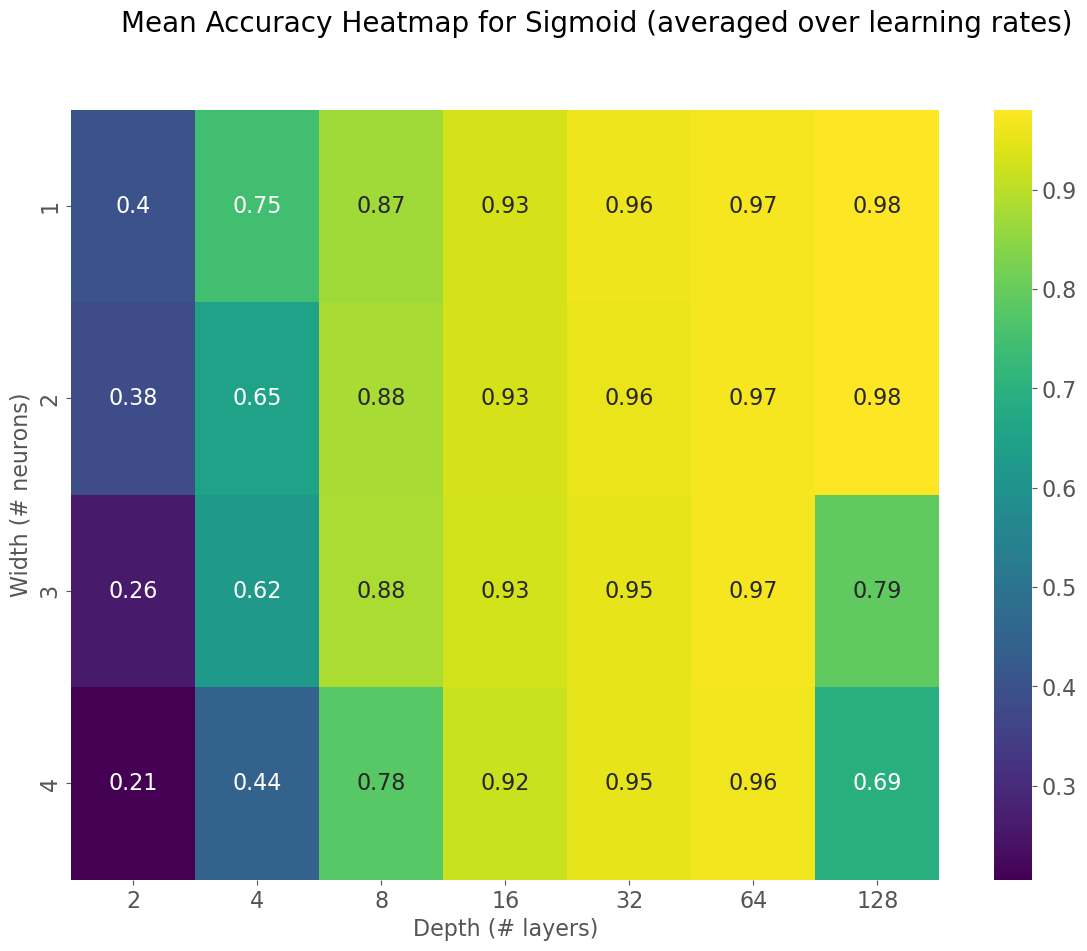

In [14]:
# Convert dict to DataFrame
df_sig = pd.DataFrame(information)
df_sig[['train_acc', 'test_acc']] = pd.DataFrame(df_sig['acc'].tolist(), index=df_sig.index)

# Compute mean accuracy across learning rates for each depth–width pair
df_sig_grouped = df_sig.groupby(['depth', 'width'], as_index=False)['train_acc'].mean()

# Pivot into matrix form for heatmap
heatmap_data = df_sig_grouped.pivot(index='depth', columns='width', values='train_acc')

# Plot heatmap
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
fig.suptitle("Mean Accuracy Heatmap for Sigmoid (averaged over learning rates)")
ax.set_xlabel("Depth (# layers)")
ax.set_ylabel("Width (# neurons)")
plt.show()

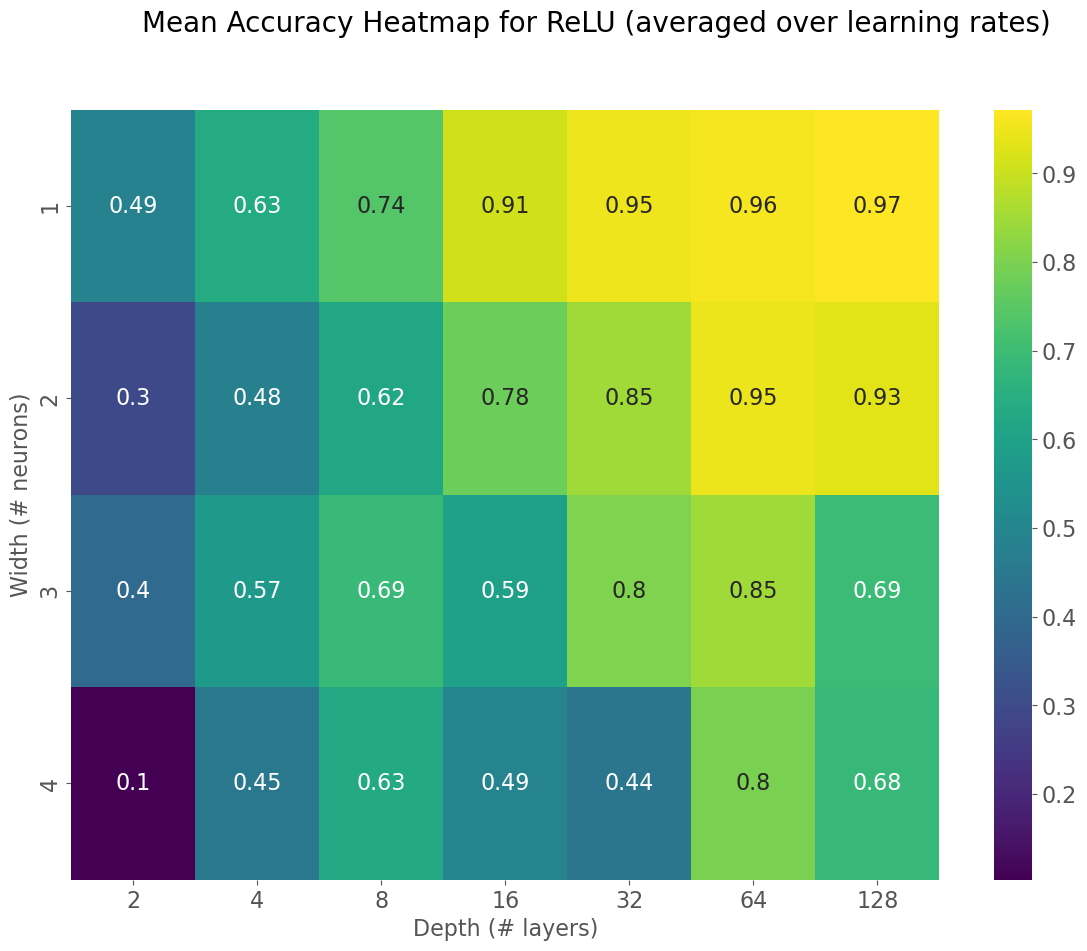

In [15]:
# Convert dict to DataFrame
df_relu = pd.DataFrame(information_Relu)
df_relu[['train_acc', 'test_acc']] = pd.DataFrame(df_relu['acc'].tolist(), index=df_relu.index)

# Compute mean accuracy across learning rates for each depth–width pair
df_sig_grouped = df_relu.groupby(['depth', 'width'], as_index=False)['train_acc'].mean()

# Pivot into matrix form for heatmap
heatmap_data = df_sig_grouped.pivot(index='depth', columns='width', values='train_acc')

# Plot heatmap
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
fig.suptitle("Mean Accuracy Heatmap for ReLU (averaged over learning rates)")
ax.set_xlabel("Depth (# layers)")
ax.set_ylabel("Width (# neurons)")
plt.show()

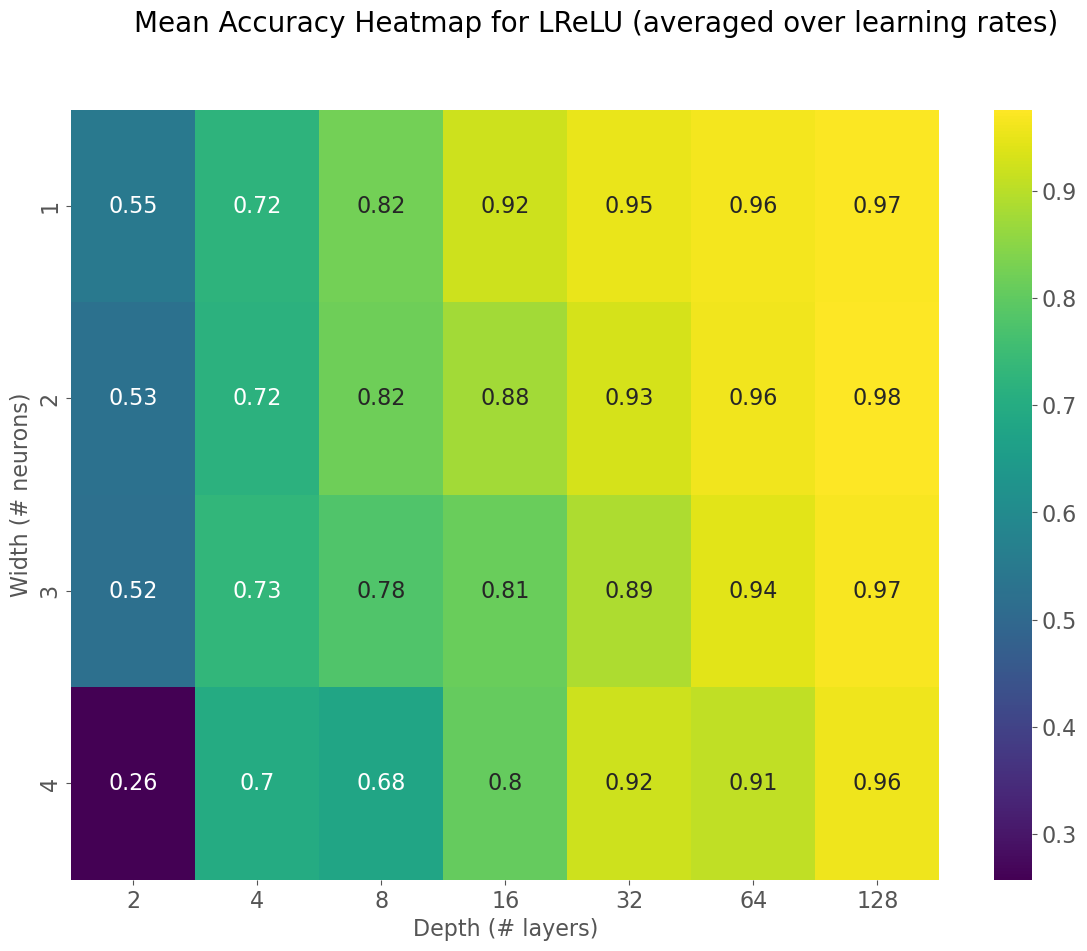

In [16]:
# Convert dict to DataFrame
df_lrelu = pd.DataFrame(information_lRelu)
df_lrelu[['train_acc', 'test_acc']] = pd.DataFrame(df_lrelu['acc'].tolist(), index=df_lrelu.index)

# Compute mean accuracy across learning rates for each depth–width pair
df_sig_grouped = df_lrelu.groupby(['depth', 'width'], as_index=False)['train_acc'].mean()

# Pivot into matrix form for heatmap
heatmap_data = df_sig_grouped.pivot(index='depth', columns='width', values='train_acc')

# Plot heatmap
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis")
fig.suptitle("Mean Accuracy Heatmap for LReLU (averaged over learning rates)")
ax.set_xlabel("Depth (# layers)")
ax.set_ylabel("Width (# neurons)")
plt.show()

In [17]:
reg_type = ['L1', 'L2']
lamb = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
for i in reg_type:
    for j in lamb:
        Reg_nn = NeuralNetwork(X_train.shape[1], [128,10], [sigmoid,  softmax], [derivate(sigmoid), derivate(softmax)], cross_entropy, cross_entropy_der, lamb=j, cost_fun_type=i)
        Reg_nn.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=0.01, optimizer='Adam')
        y_pred_train = Reg_nn._feed_forward(X_train)
        y_pred_test = Reg_nn._feed_forward(X_test)
        y_pred_label_train = np.argmax(y_pred_train, axis=1)
        y_pred_label = np.argmax(y_pred_test, axis=1)

        train_accuracy = np.mean(y_train == y_pred_label_train)
        test_accuracy = np.mean(y_test == y_pred_label)
        print(train_accuracy, test_accuracy)


0.97575 0.9677142857142857
0.9962142857142857 0.9696428571428571
0.9997142857142857 0.9664285714285714
0.9998571428571429 0.9652142857142857
0.9998571428571429 0.9632857142857143
0.9998035714285715 0.9642857142857143
0.98275 0.9722857142857143
0.9967857142857143 0.9745714285714285
0.9991428571428571 0.9663571428571428
0.9998035714285715 0.965
0.9995714285714286 0.964
0.999875 0.9645714285714285


In [18]:

lamb = [2e-2, 3e-2, 4e-2, 5e-2]
for i in reg_type:
    for j in lamb:
        Reg_nn = NeuralNetwork(X_train.shape[1], [128,10], [sigmoid,  softmax], [derivate(sigmoid), derivate(softmax)], cross_entropy, cross_entropy_der, lamb=j, cost_fun_type='L2')
        Reg_nn.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=0.01, optimizer='Adam')
        y_pred_train = Reg_nn._feed_forward(X_train)
        y_pred_test = Reg_nn._feed_forward(X_test)
        y_pred_label_train = np.argmax(y_pred_train, axis=1)
        y_pred_label = np.argmax(y_pred_test, axis=1)

        train_accuracy = np.mean(y_train == y_pred_label_train)
        test_accuracy = np.mean(y_test == y_pred_label)
        print(train_accuracy, test_accuracy)

0.9946964285714286 0.9748571428571429
0.9929107142857143 0.9756428571428571
0.99125 0.9747142857142858
0.9891607142857143 0.9747857142857143
0.9946964285714286 0.9748571428571429
0.9929107142857143 0.9756428571428571
0.99125 0.9747142857142858
0.9891607142857143 0.9747857142857143


In [43]:
Reg_nn_l2 = NeuralNetwork(X_train.shape[1], [128,10], [sigmoid,  softmax], [derivate(sigmoid), derivate(softmax)], cross_entropy, cross_entropy_der, lamb=3e-2, cost_fun_type='L2')
Reg_nn_l2.train_SGD(X_train, y_train_oh, epochs=30, batch_size=1000, learning_rate=0.01, optimizer='Adam')
y_pred_test = Reg_nn_l2._feed_forward(X_test)


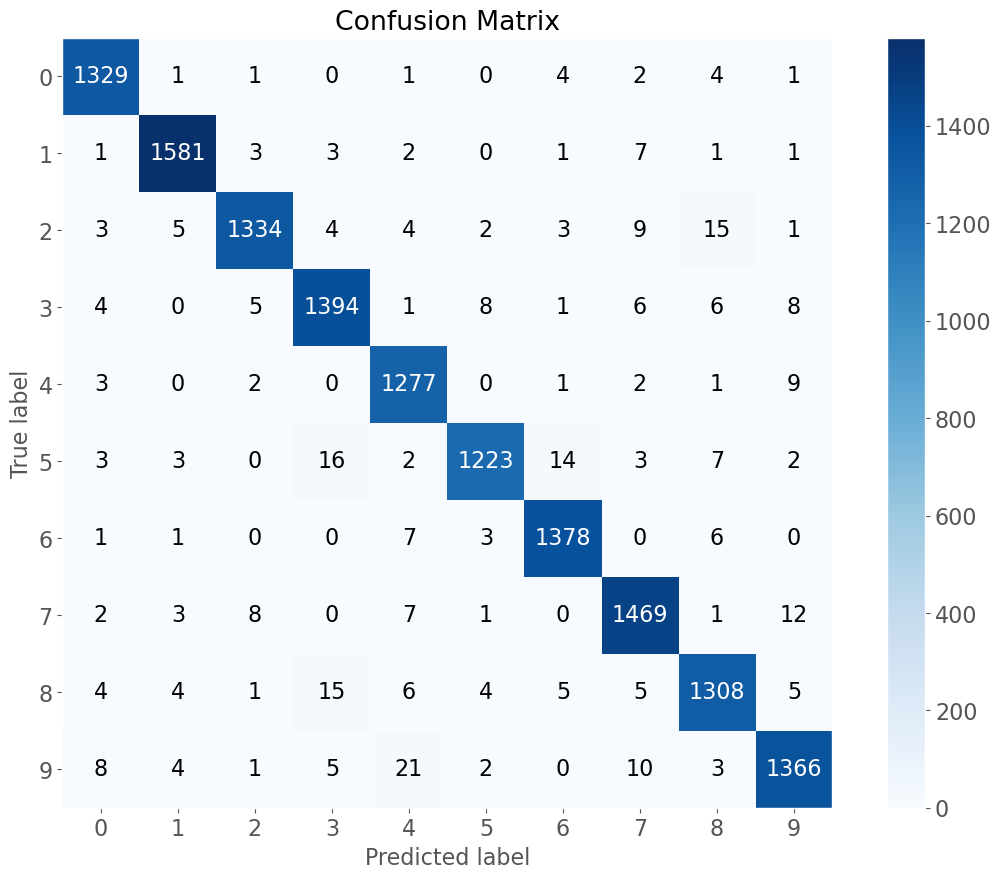

In [45]:

import numpy as np
import scipy
if not hasattr(scipy, "interp"):
    scipy.interp = np.interp
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test.argmax(axis=1), normalize=False, figsize=(14,10))
plt.show()


In [41]:

y_pred_label = np.argmax(y_pred_test, axis=1)
test_accuracy = np.mean(y_test == y_pred_label)
print(test_accuracy)

0.08735714285714286
